<a href="https://colab.research.google.com/github/Tariqul057/ML-475/blob/Lab-Works/Lab_Work_2_(475).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: SVM Classification for MNIST Handwritten

In [92]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [93]:
# Load the dataset
digits = load_digits()

In [94]:
# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [95]:
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')

x_train shape: (1437, 64), y_train shape: (1437,)


In [96]:
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the pixel values to the range [0, 1]
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Linear Kernel SVM:
Accuracy: 0.9833
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]



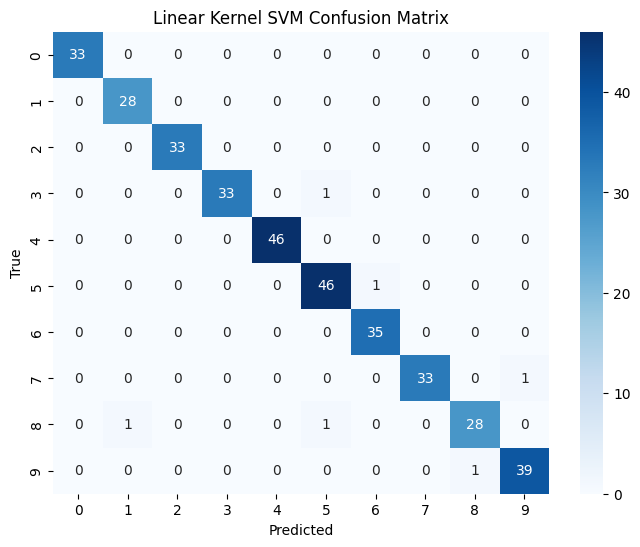

RBF Kernel SVM:
Accuracy: 0.9833
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]



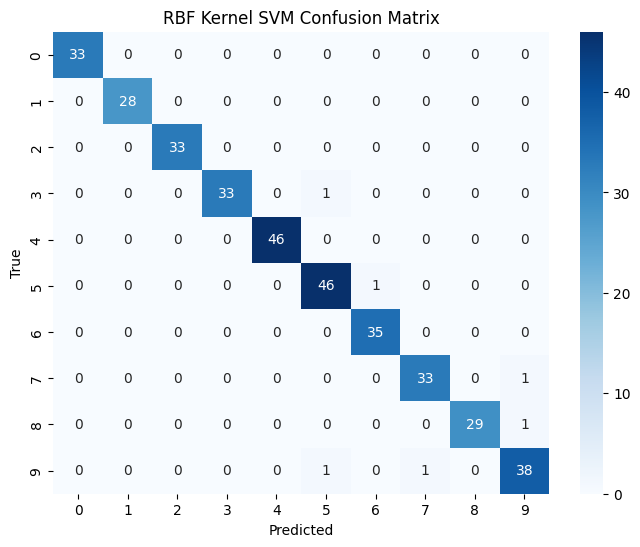

Polynomial Kernel SVM:
Accuracy: 0.9917
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]



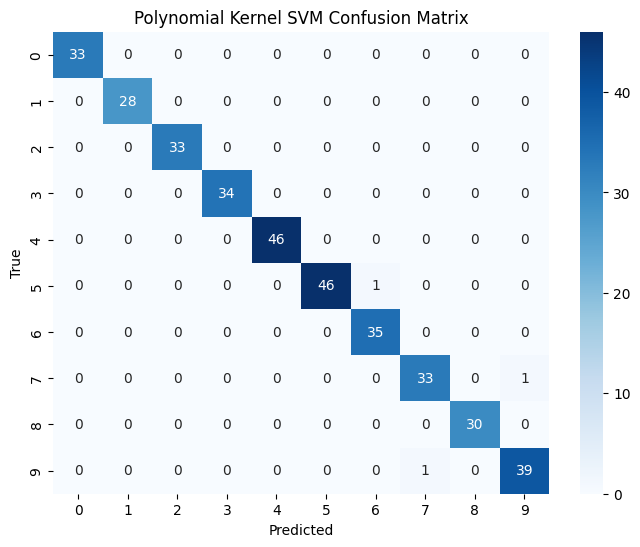

In [97]:
# Create the SVM models with different kernels
models = {
    'Linear': svm.SVC(kernel='linear'),
    'RBF': svm.SVC(kernel='rbf'),
    'Polynomial': svm.SVC(kernel='poly', degree=3)
}

# Train each model and evaluate its performance
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': cm
    }

    print(f'{name} Kernel SVM:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Confusion Matrix:\n{cm}\n')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Kernel SVM Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [98]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create the GridSearchCV object
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Fit the model
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator: SVC(C=10, gamma=0.1)
Tuned RBF Kernel SVM:
Accuracy: 0.9861
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]



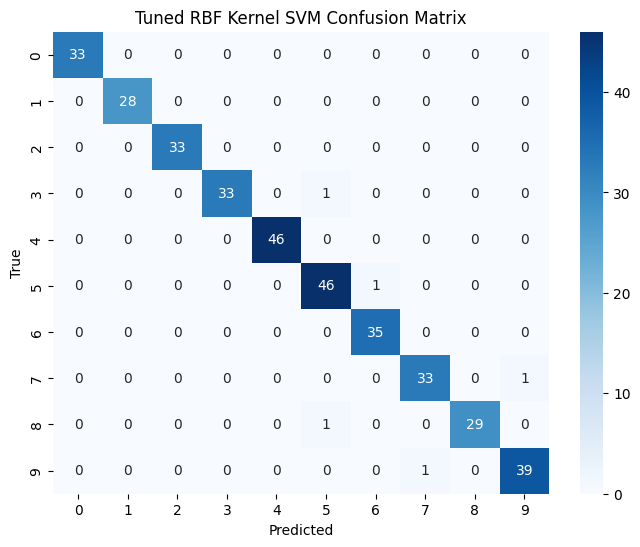

In [99]:
# Print the best parameters and estimator
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Estimator: {grid.best_estimator_}')

# Evaluate the tuned model
y_pred_tuned = grid.predict(x_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f'Tuned RBF Kernel SVM:')
print(f'Accuracy: {accuracy_tuned:.4f}')
print(f'Confusion Matrix:\n{cm_tuned}\n')

# Plot confusion matrix for tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned RBF Kernel SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Part 2: SVM Regression for Boston Housing Prices

In [100]:
# Required Libraries
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [101]:
# Load the Boston Housing Dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [102]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# SVR Model Training with Linear Kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [105]:
# SVR Model Training with RBF Kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, y_train)

SVR()

In [106]:
# Make predictions on the test set using each model
y_pred_linear = svr_linear.predict(X_test_scaled)
y_pred_rbf = svr_rbf.predict(X_test_scaled)


In [107]:
# Function to print metrics
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}\n")

In [108]:
print_metrics(y_test, y_pred_linear, "SVR Linear Kernel")

SVR Linear Kernel Model Metrics:
Mean Squared Error (MSE): 28.91852267161847
Mean Absolute Error (MAE): 3.1035741489512207
R-squared (R2): 0.6056589279132574



In [109]:
print_metrics(y_test, y_pred_rbf, "SVR RBF Kernel")

SVR RBF Kernel Model Metrics:
Mean Squared Error (MSE): 25.668539678396044
Mean Absolute Error (MAE): 2.7317161761558393
R-squared (R2): 0.6499766059760035



In [110]:
# Hyperparameter Tuning for RBF Kernel using Grid Search (Optional)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [111]:
# Best Parameters and Model Evaluation
best_svr_rbf = grid_search.best_estimator_
y_pred_best_rbf = best_svr_rbf.predict(X_test_scaled)
print(f"Best Parameters for SVR RBF Kernel: {grid_search.best_params_}")
print_metrics(y_test, y_pred_best_rbf, "Tuned SVR RBF Kernel")

Best Parameters for SVR RBF Kernel: {'C': 100, 'gamma': 0.1}
Tuned SVR RBF Kernel Model Metrics:
Mean Squared Error (MSE): 12.551945372890009
Mean Absolute Error (MAE): 2.1714957404725608
R-squared (R2): 0.8288381584589897

